Importing essentials libraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression





Importing data 
checking first 10 rows 

In [2]:
path = "supermarket_sales.csv"
df = pd.read_csv(path)
df.head(10)

,Order_ID,Order_Date,Region,Country,Sales_Rep,Team,Customer_ID,Customer_Segment,Product_Category,Product_Name,Stage,Units_Sold,Revenue,Target,Deal_Size
0,4971,2021-01-01,North,USA,David Lee,Team C,C3971,Corporate,Furniture,Office Chair,Won,6,1662,1447,1665
1,2347,2021-01-02,South,Brazil,Alice Johnson,Team B,C1347,SME,Appliances,Microwave Max,Opportunity,2,464,875,928
2,2588,2021-01-02,South,Brazil,Maria Garcia,Team C,C1588,Retail,Appliances,Refrigerator,Opportunity,5,132,277,264
3,5092,2021-01-02,East,China,Priya Sharma,Team B,C4092,Retail,Appliances,Microwave Max,Opportunity,5,610,1080,1220
4,1182,2021-01-02,North,Canada,David Lee,Team A,C0182,Retail,Electronics,Smartphone Z,Lost,0,0,854,0
5,4396,2021-01-03,North,Canada,Priya Sharma,Team A,C3396,Corporate,Furniture,Standing Desk,Lost,0,0,1225,0
6,1923,2021-01-03,South,Brazil,Wei Zhang,Team B,C0923,SME,Electronics,Tablet Air,Won,9,900,1382,908
7,4089,2021-01-04,West,UK,David Lee,Team B,C3089,SME,Electronics,Laptop Pro X,Opportunity,3,162,287,324
8,1389,2021-01-04,South,Argentina,Alice Johnson,Team A,C0389,Corporate,Appliances,Refrigerator,Won,7,1351,1147,1354
9,5630,2021-01-05,South,Argentina,John Smith,Team A,C4630,Corporate,Electronics,Smartphone Z,Won,8,848,930,851


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order_ID          5000 non-null   int64 
 1   Order_Date        5000 non-null   object
 2   Region            5000 non-null   object
 3   Country           5000 non-null   object
 4   Sales_Rep         5000 non-null   object
 5   Team              5000 non-null   object
 6   Customer_ID       5000 non-null   object
 7   Customer_Segment  5000 non-null   object
 8   Product_Category  5000 non-null   object
 9   Product_Name      5000 non-null   object
 10  Stage             5000 non-null   object
 11  Units_Sold        5000 non-null   int64 
 12  Revenue           5000 non-null   int64 
 13  Target            5000 non-null   int64 
 14  Deal_Size         5000 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 586.1+ KB


Number of rows and columns 

In [4]:
df.shape

(5000, 15)

Checking Data

In [5]:
df.describe()

,Order_ID,Units_Sold,Revenue,Target,Deal_Size
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3500.500000,2.818400,502.390000,994.572000,639.007800
std,1443.520003,2.922453,555.072392,556.665335,598.863616
min,1001.000000,0.000000,0.000000,-193.000000,0.000000
25%,2250.750000,0.000000,0.000000,567.000000,0.000000
50%,3500.500000,2.000000,347.500000,914.000000,556.000000
75%,4750.250000,5.000000,728.000000,1427.000000,1129.000000
max,6000.000000,10.000000,1999.000000,2461.000000,1999.000000


Checking Missing values 

In [6]:
df.isnull().sum().sum()

np.int64(0)

Checking Duplicated Values 


In [9]:
df.duplicated().sum()

np.int64(0)

Converting text to values 

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
text_columns = df.select_dtypes(include= ['object']).columns
for col in text_columns:
    df[col] = le.fit_transform(df[col])
    print(f"Encode {col}")

Heatmap 

<Axes: >

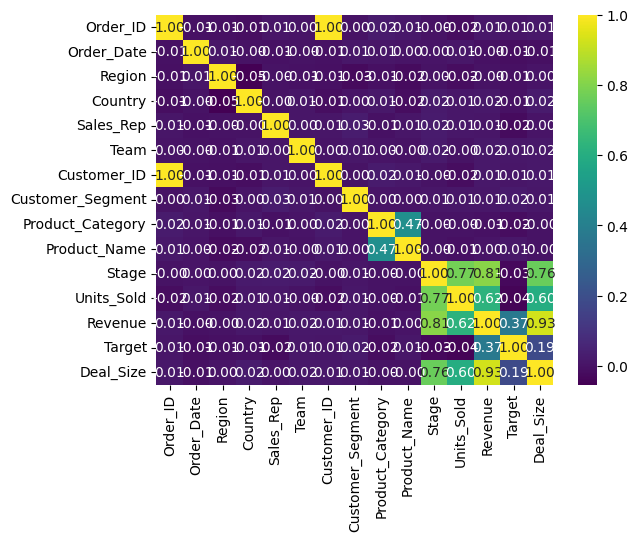

In [18]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix ,annot =True, cmap = 'viridis' ,fmt = '.2f')

Barplot 


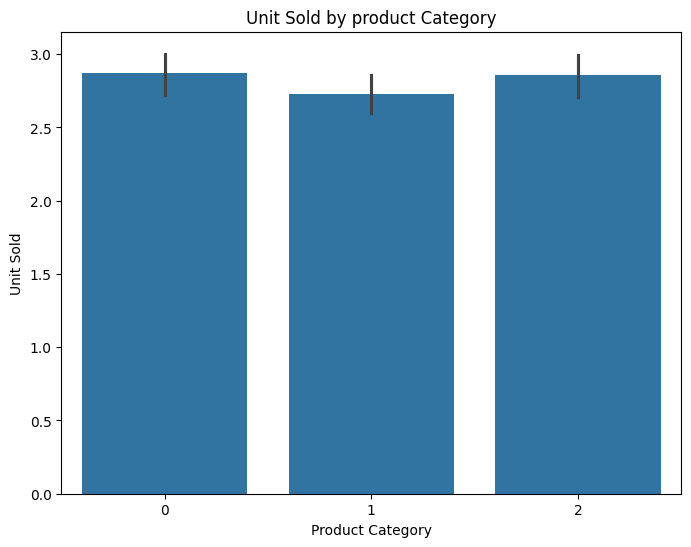

In [20]:
plt.figure(figsize= (8 ,6))
sns.barplot(x = 'Product_Category' , y = 'Units_Sold' , data = df)
plt.title("Unit Sold by product Category")
plt.xlabel("Product Category")
plt.ylabel("Unit Sold")
plt.show()

Histogram

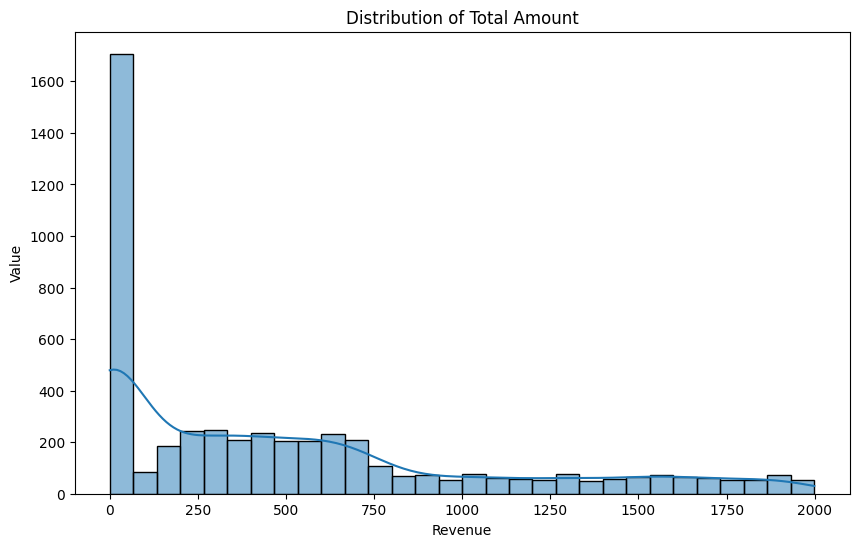

In [24]:
plt.figure(figsize=(10 ,6))
sns.histplot(df['Revenue'], bins = 30 ,kde = True)
plt.title("Distribution of Total Amount")
plt.xlabel("Revenue")
plt.ylabel("Value")
plt.show()

scatterplot

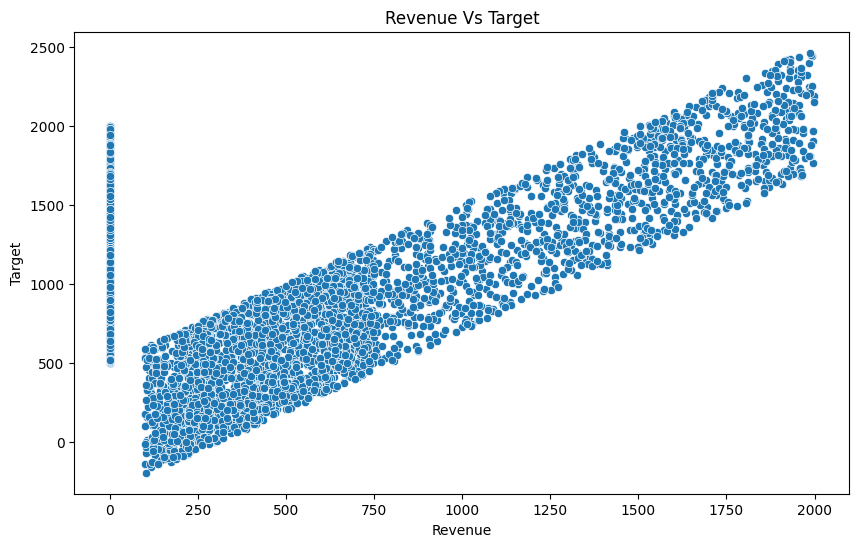

In [28]:
plt.figure(figsize = (10 ,6))
sns.scatterplot(x = "Revenue", y = 'Target' , data = df )
plt.title("Revenue Vs Target")
plt.xlabel("Revenue")
plt.ylabel("Target")
plt.show()